## This is the softmax workbook for ECE 239AS Assignment #2

Please follow the notebook linearly to implement a softmax classifier.

Please print out the workbook entirely when completed.

We thank Serena Yeung & Justin Johnson for permission to use code written for the CS 231n class (cs231n.stanford.edu).  These are the functions in the cs231n folders and code in the jupyer notebook to preprocess and show the images.  The classifiers used are based off of code prepared for CS 231n as well.

The goal of this workbook is to give you experience with training a softmax classifier.

In [175]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [176]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the linear classifier. These are the same steps as we used for the
    SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    
    # add bias dimension and transform into columns
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
    
    return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

('Train data shape: ', (49000, 3073))
('Train labels shape: ', (49000,))
('Validation data shape: ', (1000, 3073))
('Validation labels shape: ', (1000,))
('Test data shape: ', (1000, 3073))
('Test labels shape: ', (1000,))
('dev data shape: ', (500, 3073))
('dev labels shape: ', (500,))


In [177]:
aY = [2.1, 0.2, 2.3]
y = [0, 1, 2]
logSum = np.log(np.sum(np.exp(aY)))
classProb = aY[y[0]]
print (logSum)


2.963299735050387


## Training a softmax classifier.

The following cells will take you through building a softmax classifier.  You will implement its loss function, then subsequently train it with gradient descent.  Finally, you will choose the learning rate of gradient descent to optimize its classification performance.

In [178]:
from nndl import Softmax

In [179]:
# Declare an instance of the Softmax class.  
# Weights are initialized to a random value.
# Note, to keep people's first solutions consistent, we are going to use a random seed.

np.random.seed(1)

num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]

softmax = Softmax(dims=[num_classes, num_features])

#### Softmax loss

In [180]:
## Implement the loss function of the softmax using a for loop over
#  the number of examples

loss = softmax.loss(X_train, y_train)

In [181]:
print(loss)

2.3277607028048966


## Question: 

You'll notice the loss returned by the softmax is about 2.3 (if implemented correctly).  Why does this value make sense?

## Answer:

The loss is high and it makes sense because the weight matrix is randomly chosen. This is equal to log(num_classes). num of classes = 10. log10 = 2.3. This is expected as we do sum(log(y=j)).    

#### Softmax gradient

In [182]:
## Calculate the gradient of the softmax loss in the Softmax class.
# For convenience, we'll write one function that computes the loss
#   and gradient together, softmax.loss_and_grad(X, y)
# You may copy and paste your loss code from softmax.loss() here, and then
#   use the appropriate intermediate values to calculate the gradient.

loss, grad = softmax.loss_and_grad(X_dev,y_dev)

# Compare your gradient to a gradient check we wrote. 
# You should see relative gradient errors on the order of 1e-07 or less if you implemented the gradient correctly.
softmax.grad_check_sparse(X_dev, y_dev, grad)

numerical: -0.877588 analytic: -0.877588, relative error: 7.639372e-10
numerical: 1.053863 analytic: 1.053863, relative error: 6.004968e-08
numerical: 0.190154 analytic: 0.190154, relative error: 8.059006e-08
numerical: 2.096415 analytic: 2.096415, relative error: 1.085186e-08
numerical: 0.233771 analytic: 0.233771, relative error: 1.745935e-07
numerical: 1.220637 analytic: 1.220636, relative error: 2.151283e-08
numerical: -1.785057 analytic: -1.785057, relative error: 3.253666e-08
numerical: -1.569662 analytic: -1.569662, relative error: 2.301984e-08
numerical: 0.516896 analytic: 0.516896, relative error: 2.821143e-08
numerical: -1.477842 analytic: -1.477842, relative error: 5.513787e-08


## A vectorized version of Softmax

To speed things up, we will vectorize the loss and gradient calculations.  This will be helpful for stochastic gradient descent.

In [183]:
import time

In [184]:
sum = 0
loss = 0.0
dims=[10, 3073]
W = np.random.normal(size=dims) * 0.0001
aY = np.dot(X_train, np.transpose(W))
    
    
logSum = np.log(np.sum(np.exp(aY), axis = 1))
sum1 = -aY[np.arange(X_train.shape[0]), y_train]
loss = np.sum(sum1+logSum)/X_train.shape[0]
print sum1.shape

(49000,)


In [185]:
## Implement softmax.fast_loss_and_grad which calculates the loss and gradient
#    WITHOUT using any for loops.  

# Standard loss and gradient
tic = time.time()
loss, grad = softmax.loss_and_grad(X_dev, y_dev)
toc = time.time()
print('Normal loss / grad_norm: {} / {} computed in {}s'.format(loss, np.linalg.norm(grad, 'fro'), toc - tic))

tic = time.time()
loss_vectorized, grad_vectorized = softmax.fast_loss_and_grad(X_dev, y_dev)
toc = time.time()
print('Vectorized loss / grad: {} / {} computed in {}s'.format(loss_vectorized, np.linalg.norm(grad_vectorized, 'fro'), toc - tic))

# The losses should match but your vectorized implementation should be much faster.
print('difference in loss / grad: {} /{} '.format(loss - loss_vectorized, np.linalg.norm(grad - grad_vectorized)))

# You should notice a speedup with the same output.

Normal loss / grad_norm: 2.32036584895 / 329.871439636 computed in 0.231281042099s
Vectorized loss / grad: 2.32036584895 / 329.871439636 computed in 0.00636005401611s
difference in loss / grad: 0.0 /2.11434026275e-13 


## Stochastic gradient descent

We now implement stochastic gradient descent.  This uses the same principles of gradient descent we discussed in class, however, it calculates the gradient by only using examples from a subset of the training set (so each gradient calculation is faster).

## Question:

How should the softmax gradient descent training step differ from the svm training step, if at all?

## Answer:

The SVM interprets computed scores as class scores and its loss function encourages the correct class to have a score higher by a margin than the other class scores. The Softmax classifier instead interprets the scores as (unnormalized) log probabilities for each class and then encourages the (normalized) log probability of the correct class to be high. 

In SVM cost function is loss scores and in Softmax it is log Probabilities. So in SVM gradient, we reduce the loss and in softmax we increase the log probability. 

iteration 0 / 1500: loss 2.40500420842
iteration 100 / 1500: loss 2.07570101
iteration 200 / 1500: loss 2.05672734652
iteration 300 / 1500: loss 1.97651770031
iteration 400 / 1500: loss 1.9063129596
iteration 500 / 1500: loss 1.91017064455
iteration 600 / 1500: loss 1.98994833994
iteration 700 / 1500: loss 1.82911919946
iteration 800 / 1500: loss 1.83537656104
iteration 900 / 1500: loss 1.83746196393
iteration 1000 / 1500: loss 1.78263530483
iteration 1100 / 1500: loss 1.8246265651
iteration 1200 / 1500: loss 1.83692948919
iteration 1300 / 1500: loss 1.82663301352
iteration 1400 / 1500: loss 1.79349164587
That took 3.10122203827s


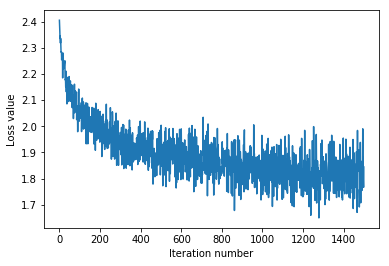

In [186]:
# Implement softmax.train() by filling in the code to extract a batch of data
# and perform the gradient step.
import time


tic = time.time()
loss_hist = softmax.train(X_train, y_train, learning_rate=1e-7,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took {}s'.format(toc - tic))

plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

### Evaluate the performance of the trained softmax classifier on the validation data.

In [203]:
## Implement softmax.predict() and use it to compute the training and testing error.

y_train_pred = softmax.predict(X_train)
print('training accuracy: {}'.format(np.mean(np.equal(y_train,y_train_pred), )))
y_val_pred = softmax.predict(X_val)
print('validation accuracy: {}'.format(np.mean(np.equal(y_val, y_val_pred)), ))

training accuracy: 0.370326530612
validation accuracy: 0.372


## Optimize the softmax classifier

You may copy and paste your optimization code from the SVM here.

In [215]:
np.finfo(float).eps

2.220446049250313e-16

In [216]:
# ================================================================ #
# YOUR CODE HERE:
#   Train the Softmax classifier with different learning rates and 
#     evaluate on the validation data.
#   Report:
#     - The best learning rate of the ones you tested.  
#     - The best validation accuracy corresponding to the best validation error.
#
#   Select the SVM that achieved the best validation error and report
#     its error rate on the test set.
# ================================================================ #
learningRates = [5e-12, 5e-10, 5e-9, 5e-8, 5e-7, 5e-6, 5e-5, 5e-4, 5e-2, 5e-2, 5e1, 5e2]
trainingAccuracy = []
validationAccuracy = []
for learningRate in learningRates:
    #print "-"*40, "\n"
    #print " learning rate is:", learningRate, "\n"
  
    loss_hist = softmax.train(X_train, y_train, learning_rate=learningRate,
                      num_iters=1500, verbose=False)
    y_train_pred = softmax.predict(X_train)
    trainingAccuracy.append(np.mean(np.equal(y_train,y_train_pred)))
    #print('training accuracy: {}'.format(np.mean(np.equal(y_train,y_train_pred), )))
    y_val_pred = softmax.predict(X_val)
    validationAccuracy.append(np.mean(np.equal(y_val, y_val_pred)))
    #print('validation accuracy: {}'.format(np.mean(np.equal(y_val, y_val_pred)), ))
    
# ================================================================ #
bestvalidation = validationAccuracy[np.argsort(validationAccuracy)[-1]]
bestLearningRate = learningRates[np.argsort(validationAccuracy)[-1]]
print "Best Validation accuracy: ", bestvalidation
print "Corresponding learning rate: ", bestLearningRate
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #


Best Validation accuracy:  0.408
Corresponding learning rate:  5e-07


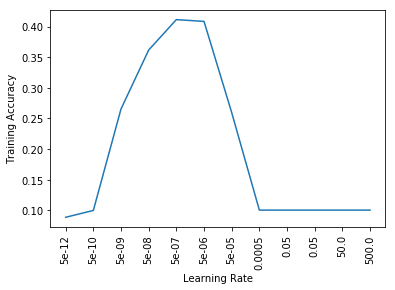

In [217]:
plt.plot(range(len(learningRates)), trainingAccuracy)
plt.xticks(range(len(learningRates)), learningRates, rotation =90)
plt.xlabel('Learning Rate')
plt.ylabel('Training Accuracy')

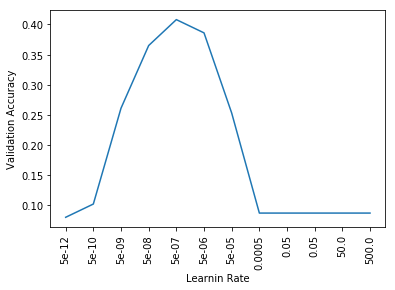

In [218]:
plt.plot(range(len(learningRates)), validationAccuracy)
plt.xticks(range(len(learningRates)), learningRates, rotation =90)
plt.xlabel('Learnin Rate')
plt.ylabel('Validation Accuracy')

In [219]:
loss_hist = loss_hist = softmax.train(X_train, y_train, learning_rate=bestLearningRate,
                      num_iters=1500, verbose=False)


y_test_pred = softmax.predict(X_test)
testingAccuracy = np.mean(np.equal(y_test,y_test_pred))
print "Testing accuracy is: ", testingAccuracy
print "Testing Error is: ", 1-testingAccuracy

Testing accuracy is:  0.393
Testing Error is:  0.607
